In [3]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv("dogs_with_clusters_eng.csv")

# Ver columnas disponibles
print(df.columns)

Index(['nombre', 'sexo', 'edad', 'tamaño', 'especie', 'descripcion',
       'protectora', 'ubicación', 'peso', 'nivel_actividad', 'mi_historia',
       'url', 'origen', 'cluster'],
      dtype='object')


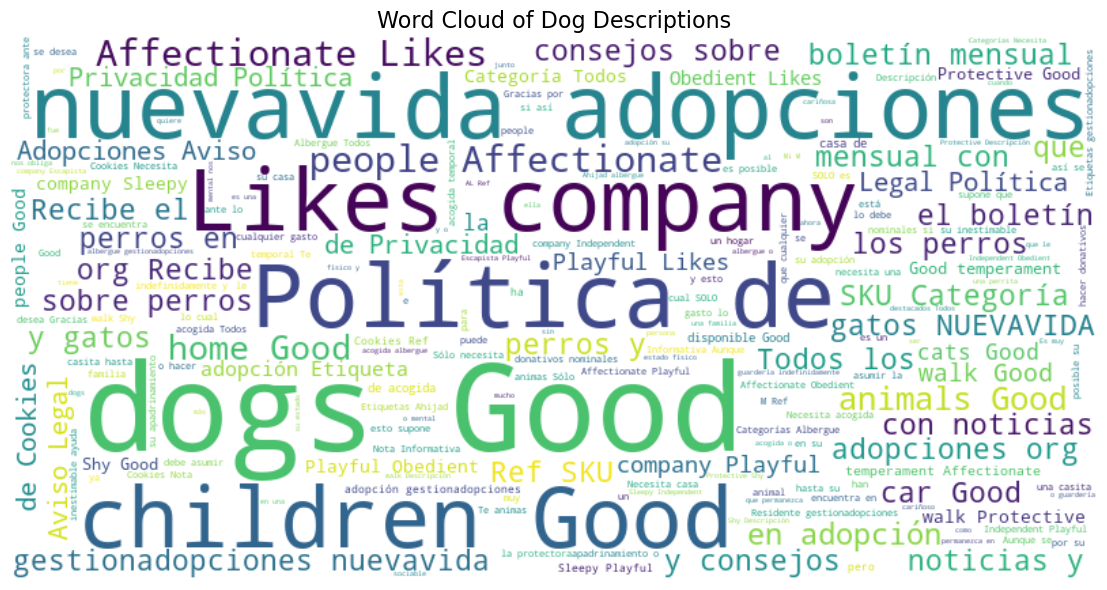

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todas las descripciones
all_descriptions = " ".join(df['descripcion'].dropna().astype(str))

# Crear WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_descriptions)

# Mostrar WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Dog Descriptions", fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/9b/1k3cjn9x4cg_w6793ryzh2hw0000gn/T/ipykernel_37404/1965563879.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')


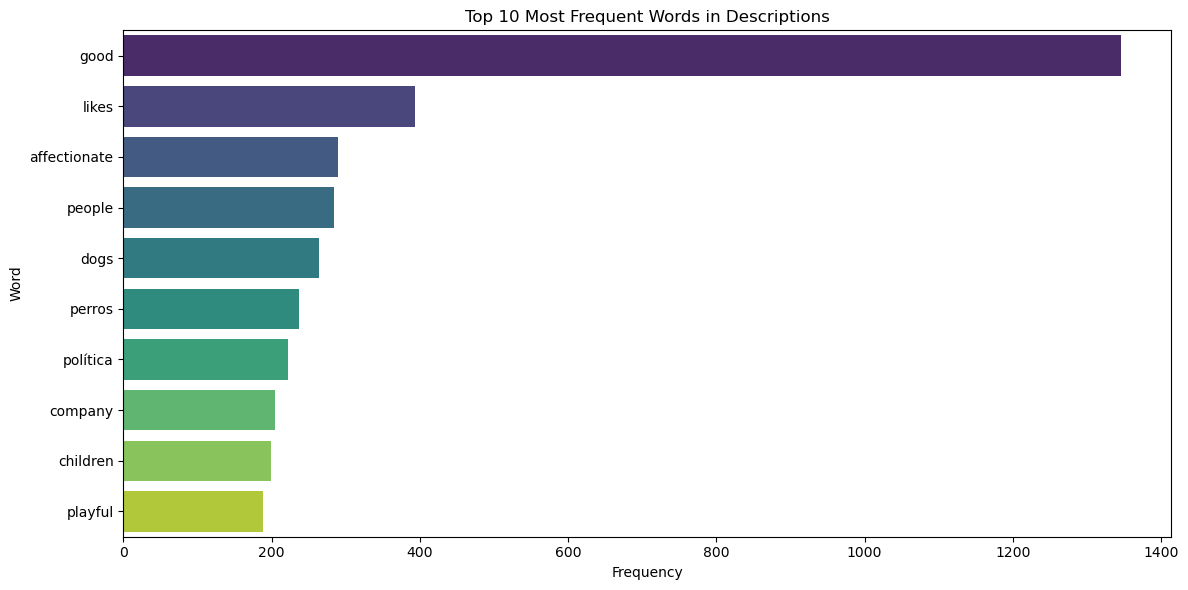

In [7]:
from collections import Counter
import seaborn as sns
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Limpiar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS and len(word) > 2]
    return words

# Unir y limpiar palabras
all_words = []
for desc in df['descripcion'].dropna():
    all_words.extend(clean_text(desc))

# Contar y mostrar
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Plot
freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')
plt.title("Top 10 Most Frequent Words in Descriptions")
plt.tight_layout()
plt.show()

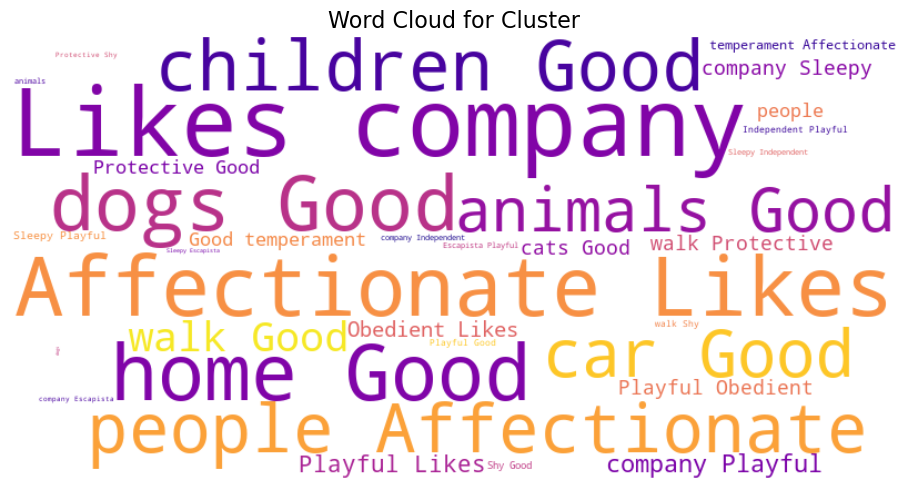

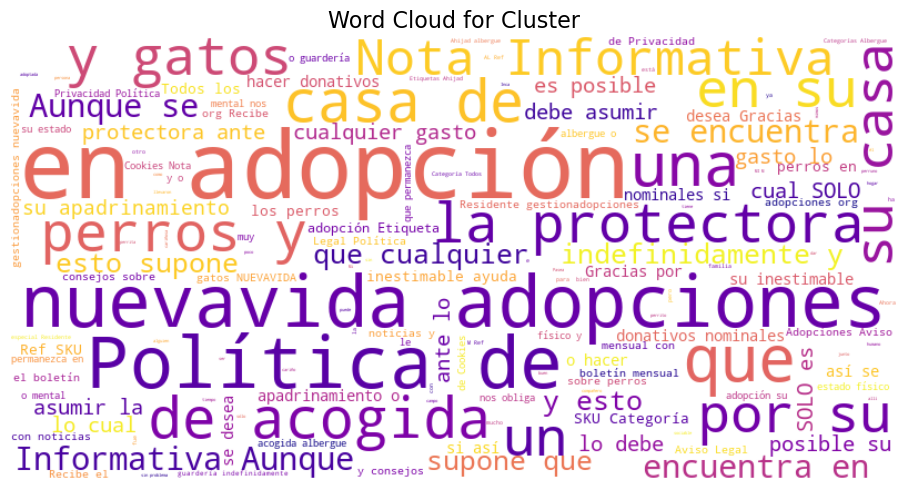

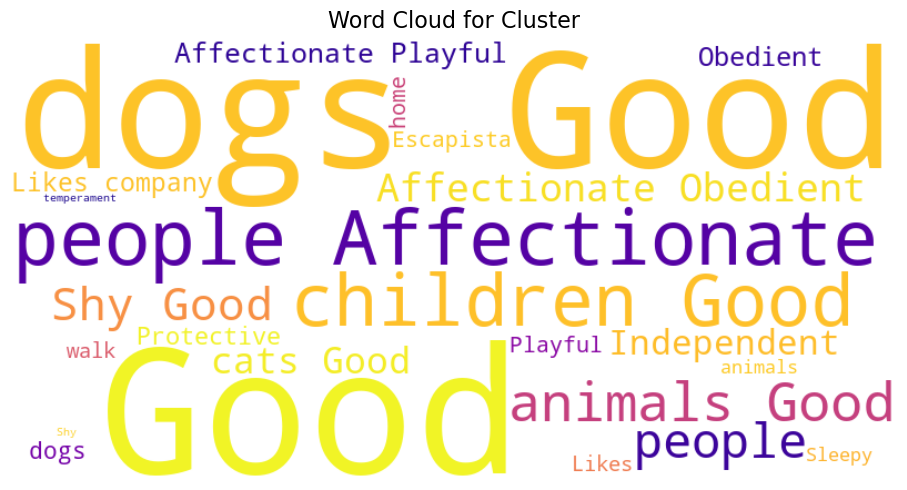

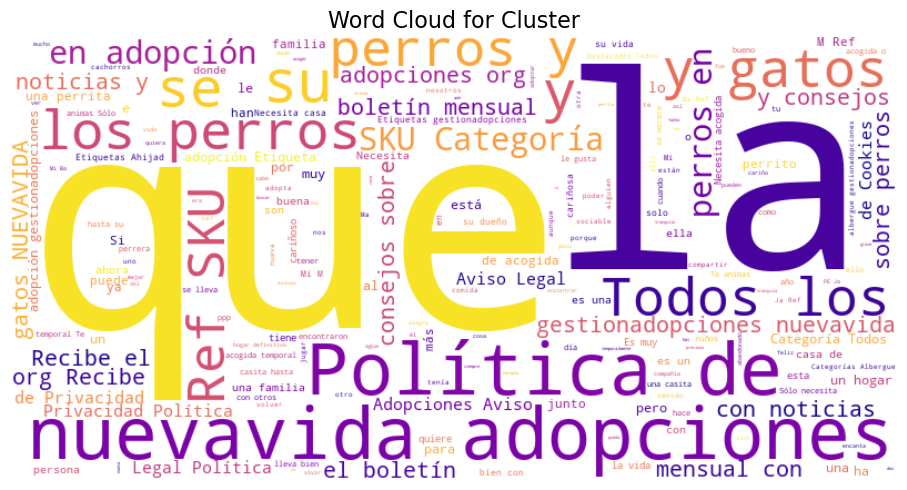

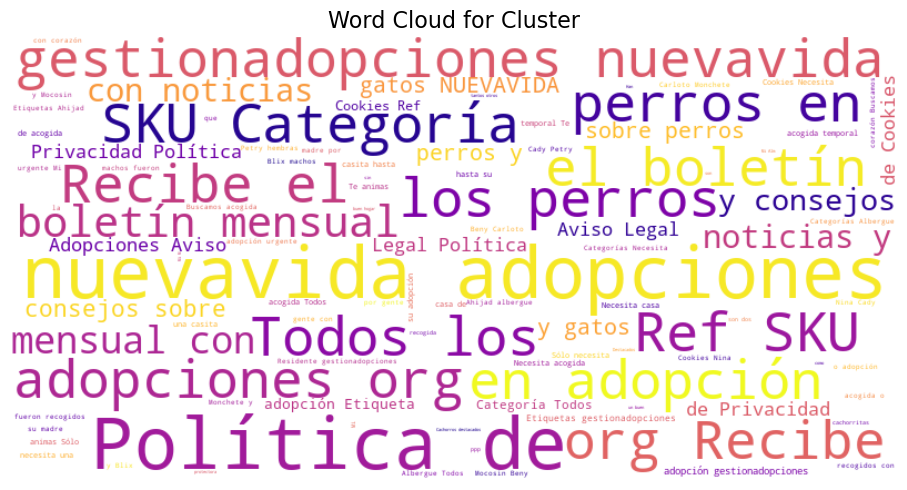

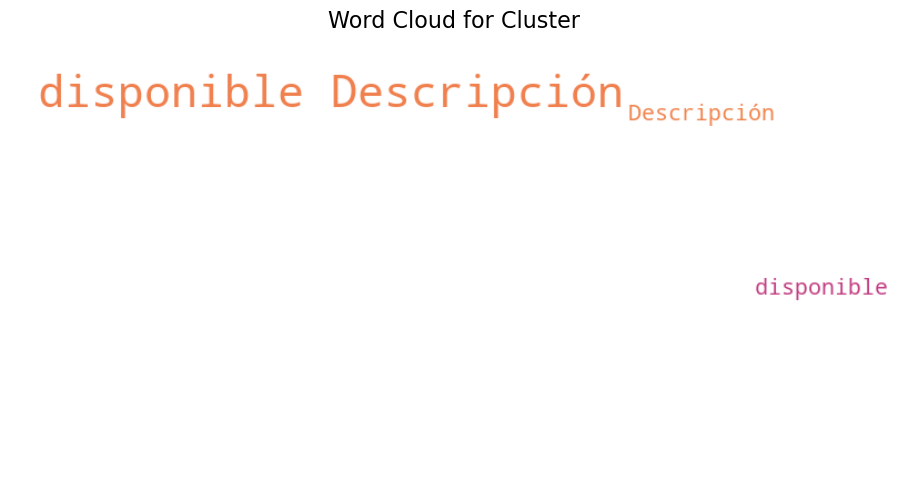

In [17]:
clusters = df['cluster'].dropna().unique()

for cluster in sorted(clusters):
    text = " ".join(df[df['cluster'] == cluster]['descripcion'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster", fontsize=16)
    plt.tight_layout()
    plt.show()

In [12]:
df = df.replace({
    "Desconocido": "Unknown",
    "Sin determinar": "Undetermined",
    "Muy Alta": "Very High"
})

In [14]:
df['tamaño'] = df['tamaño'].replace({
    'Pequeño (6-14 kg)': 'Small',
    'Mini (hasta 5 kg)': 'Small',
    'Pequeño (6-12 kg)': 'Small',
    
    'Mediano (15-25 kg)': 'Medium',
    
    'Grande (+ 25 kg)': 'Large',
    'Muy grande (+ 50 kg)': 'Giant'
})

/var/folders/9b/1k3cjn9x4cg_w6793ryzh2hw0000gn/T/ipykernel_37404/3118289347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


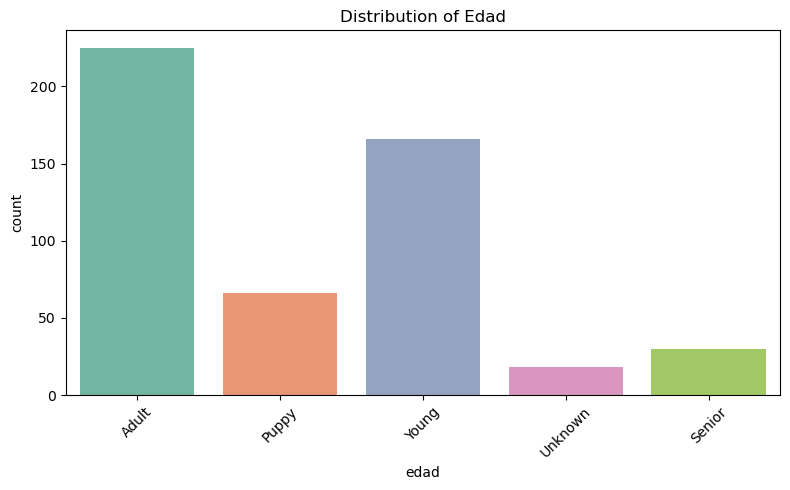

/var/folders/9b/1k3cjn9x4cg_w6793ryzh2hw0000gn/T/ipykernel_37404/3118289347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


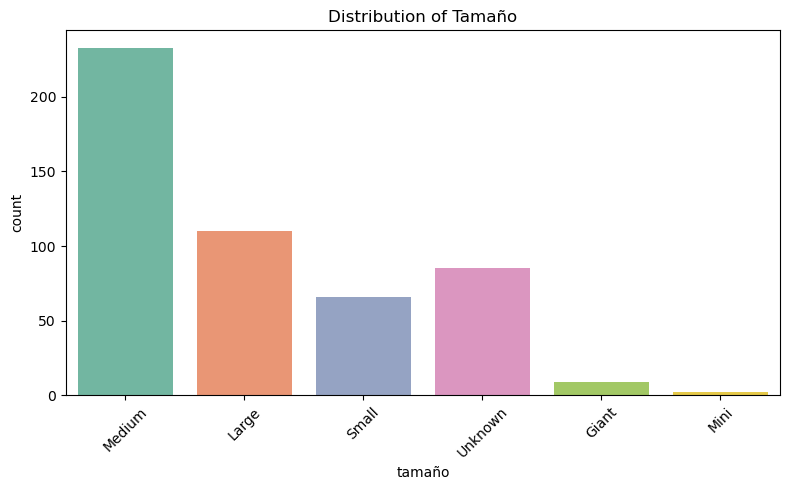

/var/folders/9b/1k3cjn9x4cg_w6793ryzh2hw0000gn/T/ipykernel_37404/3118289347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


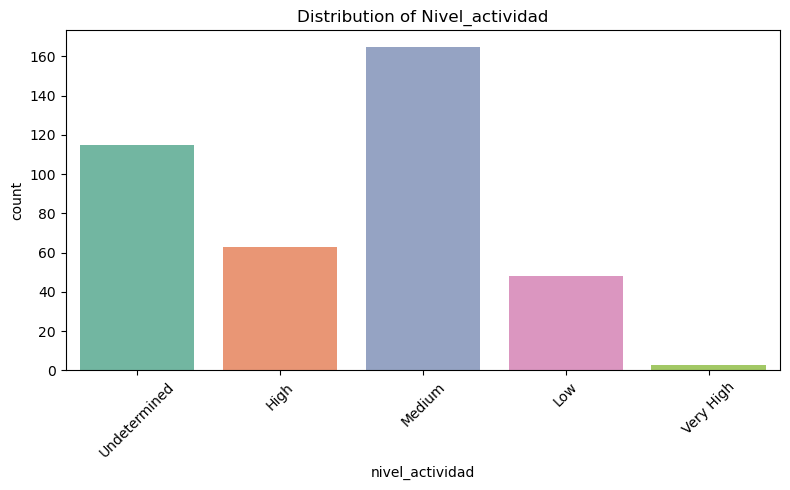

In [15]:
categorical_cols = ['edad', 'tamaño', 'nivel_actividad']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
df.to_csv("dogs_with_clusters_eng.csv", index=False)

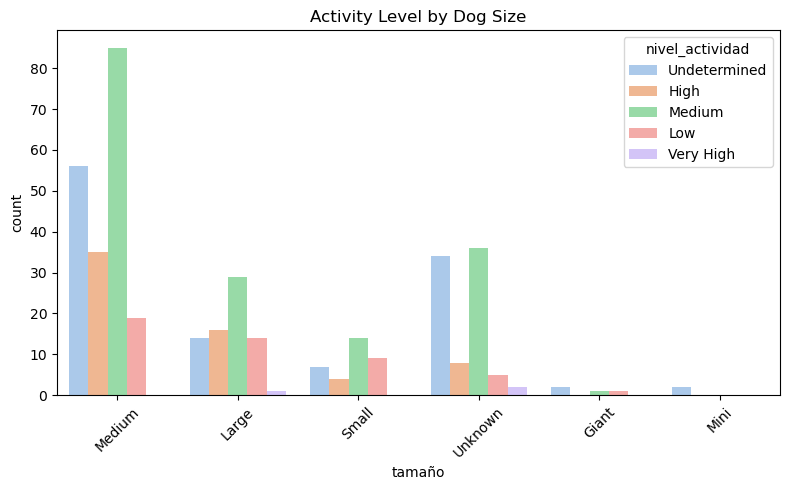

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tamaño', hue='nivel_actividad', palette='pastel')
plt.title("Activity Level by Dog Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/9b/1k3cjn9x4cg_w6793ryzh2hw0000gn/T/ipykernel_37404/1951263182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='Reds')


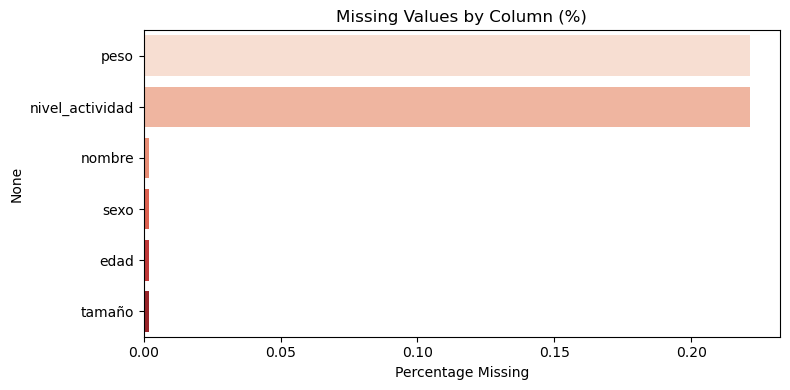

In [19]:
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(8, 4))
sns.barplot(x=missing.values, y=missing.index, palette='Reds')
plt.title("Missing Values by Column (%)")
plt.xlabel("Percentage Missing")
plt.tight_layout()
plt.show()